# Simple-LaMa example usage

### Step 0: Install stuffs

In [1]:
!pip install numpy torch

### Step 1: Prepare your image

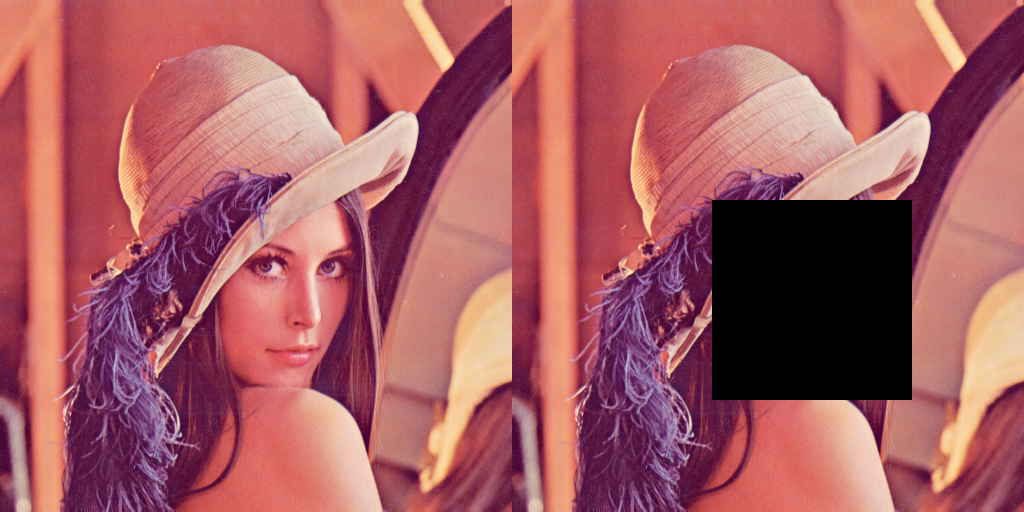

In [2]:
from PIL import Image
import numpy as np

image = Image.open('lenna.png')

masked = np.array(image)
masked[200:400, 200:400, :] = 0
mask = np.zeros(image.size)
mask[200:400, 200:400] = 1.0

to_display = Image.new('RGB', (image.size[0] * 2, image.size[1]))
to_display.paste(image, (0, 0))
to_display.paste(Image.fromarray(masked), (image.size[0], 0))
display(to_display)

### Step 2: Load your LaMa

In [3]:
from lama import LaMa

model = LaMa('cuda')

### Step 3: Inpaint!

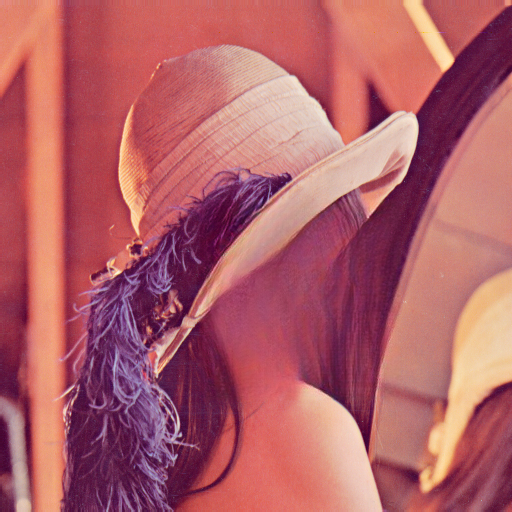

In [4]:
lama_image = model(masked, mask)

display(Image.fromarray(lama_image))